# This notebook demonstrate generation of training data:
## from raw .apt and .RRNG files to .h5 files with reasonbale augmentation


In [1]:
import torch
import os,sys
import RangingNN
import numpy as np
import h5py
import apav
import matplotlib.pyplot as plt

In [2]:
filelist = sorted(os.listdir('/srv/home/jwei74/APT_ML/rawdata/'))
# range_source = sorted(os.listdir('/srv/home/jwei74/APT_ML/rawdata/ExaminedRanges/'))
datalist = []
rangelist = []
for f in filelist:
    if f[-4:]=='RRNG':
        print(f)
        datalist.append('/srv/home/jwei74/APT_ML/rawdata/'+f[:-4]+'apt')
        rangelist.append('/srv/home/jwei74/APT_ML/rawdata/'+f)
len(datalist), len(rangelist)

R13_40310Zr Top Level ROI.RRNG
R16_50678 NiPdSi Top Level ROI.RRNG
R17_101977 SiN.RRNG
R17_89420-v03 ranging for uw.RRNG
R17_94469 WRe Top Level ROI.RRNG
R17_98556-v02 ranging for uw.RRNG
R18_61451 matchUSYD.RRNG
R2001_185741ZrSiO UW Analysis Zircon.RRNG
R40_110290-v01 AuAlloy.RRNG
R41_143855Ru Top Level ROI.RRNG
R5086_258504_UNSM_SS.RRNG
R5100_228062 W.RRNG
R5100_235274UW Ranging Top Level ROI.RRNG
R56_138794 YWT Top Level ROI.RRNG
R6001_233217CuBe.RRNG
R6006_254275 Cu LP.RRNG
R6006_254276 Cu VpL.RRNG
R6012_264025 7000Al UW Ranging.RRNG
R6025_267386_NMC811_M04 example analysis.RRNG
R69_152985-v01 Si device.RRNG


(20, 20)

In [ ]:
import apav
for k in range(len(rangelist)):
    print('Working on:', rangelist[k], 'Sc1' in ions)
    range_data = apav.RangeCollection.from_rrng(rangelist[k])
    ions = np.unique(np.array([r.ion.formula for r in range_data.ranges]))


In [6]:
from numba import jit
from peak_detection.RangingNN.data_generation import Augmentation

@jit(nopython=False, parallel=True)
def main(index):
    aug = Augmentation(apt_file=datalist[index], ranging_file=rangelist[index], savepath = '/srv/home/jwei74/APT_ML/hdf5s/')
    aug.file2h5()
    print('Finished', i)

/tmp/ipykernel_4012108/1204371892.py:4: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(nopython=False, parallel=True)


In [7]:
import numba
for i in numba.prange(len(datalist)):
    main(i)
    # if i>13:
    #     break

/tmp/ipykernel_4012108/1204371892.py:4: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "main" failed type inference due to: Untyped global name 'Augmentation': Cannot determine Numba type of <class 'type'>

File "../../../../tmp/ipykernel_4012108/1204371892.py", line 6:
<source missing, REPL/exec in use?>

  @jit(nopython=False, parallel=True)
/srv/home/jwei74/.local/lib/python3.10/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "main" was compiled in object mode without forceobj=True.

File "../../../../tmp/ipykernel_4012108/1204371892.py", line 4:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
/srv/home/jwei74/.local/lib/python3.10/site-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected. This is deprecated behaviour that will be removed in Numba 0.59.

Augmentation finished for R13_40310Zr Top Level ROI
h5 file writting finished
Finished 0
Augmentation finished for R16_50678 NiPdSi Top Level ROI
h5 file writting finished
Finished 1
Augmentation finished for R17_101977 SiN
h5 file writting finished
Finished 2
Augmentation finished for R17_89420-v03 ranging for uw
h5 file writting finished
Finished 3
Augmentation finished for R17_94469 WRe Top Level ROI
h5 file writting finished
Finished 4
Augmentation finished for R17_98556-v02 ranging for uw
h5 file writting finished
Finished 5
Augmentation finished for R18_61451 matchUSYD
h5 file writting finished
Finished 6
Augmentation finished for R2001_185741ZrSiO UW Analysis Zircon
h5 file writting finished
Finished 7
Augmentation finished for R40_110290-v01 AuAlloy
h5 file writting finished
Finished 8
Augmentation finished for R41_143855Ru Top Level ROI
h5 file writting finished
Finished 9
Augmentation finished for R5086_258504_UNSM_SS
h5 file writting finished
Finished 10
Augmentation finishe

# backup

In [33]:
k = 2

apt_data = apav.load_apt(datalist[k])
range_data = apav.RangeCollection.from_rrng(rangelist[k])
peakwidth = np.array([r.upper - r.lower for r in range_data.ranges])
rng_array = np.array(range_data.ranges)
# range_data = apav.RangeCollection(rng_array[np.where(peakwidth > bin_width)])

peakwidth = np.array([r.upper - r.lower for r in range_data.ranges])
peakcenter = np.array([(r.upper + r.lower) * 0.5 for r in range_data.ranges])
peaks = np.vstack((peakcenter, peakwidth)).T
ions = np.array([r.ion.formula for r in range_data.ranges])

In [27]:
from copy import deepcopy
test = deepcopy(range_data)
# test.remove_by_mass(12) #as long as it fell in the range I guess
#replace(old_rng, new_rng)
#test.add(apav.Range("Si", (13.891, 14.44)))
print(datalist[k])
test.add(apav.Range("X", (18.45,18.48)))

test.to_rrng(rangelist[k])


/srv/home/jwei74/APT_ML/rawdata/R16_50678 NiPdSi Top Level ROI.apt


Range: X, Min: 64.92, Max: 65.06, Vol: 1, Color: [0, 0, 0]

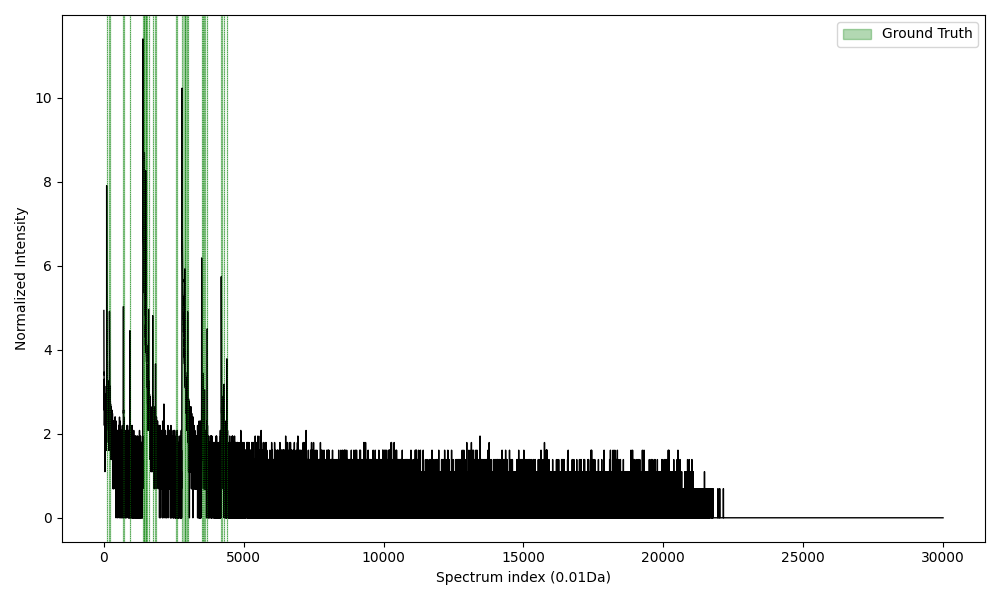

In [34]:
import sys
%matplotlib widget
plt.close('all')

from RangingNN.model_utils import cw2lh
from apav import RoiRectPrism
from apav.analysis.spatial import make_coordinate_grids

import itertools

plot_min = 0
plot_max = 30000
bin_width = 0.01

ratio = 0.9
X,Y,Z = make_coordinate_grids(apt_data.xyz_extents, bin_width=apt_data.dimensions*ratio)
slice_rois = []
for (i,j,l) in itertools.product(range(X.shape[0]-1),range(X.shape[1]-1),range(X.shape[2]-1)):
    width =  apt_data.dimensions * ratio
    slice_rois.append(RoiRectPrism(apt_data, (X[i,0,0]+width[0],Y[0,j,0]+width[1],Z[0,0,l]+width[2]), width))

x, y = slice_rois[0].mass_histogram(bin_width = bin_width,lower = 0,upper= 307.20,multiplicity = 'all',norm = False,)
gt_ranges = cw2lh(peaks / bin_width)# target ranges denormalized, in pixels
gt_ranges = gt_ranges[(gt_ranges[:,0] < plot_max) & (gt_ranges[:,0] > plot_min)]
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the spectrum
x = torch.linspace(plot_min,plot_max, plot_max- plot_min)

ax.plot(x[...,None],np.log(y+1)[..., plot_min:plot_max].T, 'k-', linewidth=1)
#np.log(y+1)

for start, end in gt_ranges:
    ax.axvspan(start, end, alpha=0.3, color='green',label='Ground Truth'if start == gt_ranges[0][0] else "")
    
for start, end in gt_ranges:
    ax.axvline(start, color='green', linestyle=':', alpha=0.7, lw = 0.5)
    ax.axvline(end, color='green', linestyle=':', alpha=0.7, lw = 0.5)
    
# Set labels and title
ax.set_xlabel('Spectrum index (0.01Da)')
ax.set_ylabel('Normalized Intensity')

# Adjust the plot layout
plt.tight_layout()
plt.legend()